# ![.right](https://lh6.ggpht.com/wUrTIhpHPVqw_VPCdhbSiF5TXlBlLyRHdH1gsII_y5NkgYKzbbj7cC2l6AGoVq-JN0U=w100 "MSDS 7331 Data Mining - Project 1")


# Housing Data Analysis

---



# Team Members

- Chris Woodard
- Claire Chu
- Nathan Mowat
- Bill Kerneckel

# Rubic

- [Data Preperation 1](#dp1) 

- [Data Preperation 2](#dp2)

- [Modeling and Evaluation 1](#me1)

- [Modeling and Evaluation 2](#me2)

- [Modeling and Evaluation 3](#me3)

- [Modeling and Evaluation 4](#me4)

- [Modeling and Evaluation 5](#me5)

- [Modeling and Evaluation 6](#me6)

- [Deployment](#d)

- [Exceptional Work](#ew)

- [Appendix](#a)

<hr>



In [2]:
#load python libaries
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as pl
import seaborn as sns
import glob
import sys
import os
import warnings
import ggplot
import datetime
import time
from datetime import date
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
%matplotlib inline

In [4]:
data_file = pd.read_excel('/Users/macnificent/Desktop/DataMiningClass-master/house_data_CLEAN.xls') 

In [89]:
df = [data_file]
cdf = pd.concat(df, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
cdf.reset_index()

,index,region_name,region_id,score,coverage,CurbRamp,NoCurbRamp,Obstacle,SurfaceProblem,CurbRampSig,...,X2016.10,X2016.11,X2016.12,X2017.01,X2017.02,X2017.03,X2017.04,X2017.05,AVG,AVG JUN2013-MAY2017
0,1,Adams Morgan,198,0.999523,1.000000,10.411765,0.558824,2.088235,0.117647,1,...,609,611,614,623,633,637,634,630,584.041667,584.041667
1,2,American University Park,195,0.957738,0.183544,4.913793,0.844828,0.206897,0.741379,1,...,605,609,613,619,625,630,628,625,566.125000,566.125000
2,3,Barnaby Woods,218,0.613824,0.185520,2.829268,0.902439,0.853659,0.609756,1,...,519,521,524,529,535,537,531,526,499.500000,499.500000
3,4,Bellevue,364,0.926795,0.549296,10.871795,3.641026,1.974359,2.717949,1,...,248,250,251,255,263,269,270,270,210.500000,210.500000
4,5,Benning,340,0.978977,0.536585,9.340909,2.840909,2.159091,0.500000,1,...,234,237,241,247,253,256,258,259,205.458333,205.458333
5,6,Benning Ridge,315,0.741840,1.000000,6.277778,4.574074,0.018519,0.629630,1,...,267,272,280,289,297,299,298,297,225.500000,225.500000
6,7,Bloomingdale,271,0.865720,0.318841,3.818182,0.454545,0.545455,0.954545,1,...,486,491,497,503,512,519,519,518,439.354167,439.354167
7,8,Brentwood,277,0.998761,0.669118,11.164835,1.340659,2.186813,0.945055,1,...,349,353,356,356,354,356,362,365,284.791667,284.791667
8,9,Brightwood,268,0.998348,0.500000,8.425532,1.000000,0.553191,0.468085,1,...,422,430,433,435,440,443,440,437,375.416667,375.416667
9,10,Brightwood Park,325,0.996490,0.370000,8.351351,1.864865,0.189189,0.648649,1,...,400,404,407,414,422,427,426,424,357.458333,357.458333


In [90]:
#investigate the distributions so we can see where we 
#should make our dummy variable cuts
firstcurbqt = np.percentile(cdf.CurbRamp, 25)
secondcurbqt = np.percentile(cdf.CurbRamp, 50)
thirdcurbqt = np.percentile(cdf.CurbRamp, 75)

print("Curb Ramp Distribution: ", firstcurbqt, secondcurbqt, thirdcurbqt)

firstnocurbqt = np.percentile(cdf.NoCurbRamp, 25)
secondnocurbqt = np.percentile(cdf.NoCurbRamp, 50)
thirdnocurbqt = np.percentile(cdf.NoCurbRamp, 75)

print("No Curb Distribution: ", firstnocurbqt, secondnocurbqt, thirdnocurbqt)

firstobsqt = np.percentile(cdf.Obstacle, 25)
secondobsqt = np.percentile(cdf.Obstacle, 50)
thirdobsqt = np.percentile(cdf.Obstacle, 75)

print("Obstacle Distribution: ", firstobsqt, secondobsqt, thirdobsqt)

firstsurfqt = np.percentile(cdf.SurfaceProblem, 25)
secondsurfqt = np.percentile(cdf.SurfaceProblem, 50)
thirdsurfqt = np.percentile(cdf.SurfaceProblem, 75)

print("Surface Problem Distribution: ", firstsurfqt, secondsurfqt, thirdsurfqt)

Curb Ramp Distribution:  6.21739130435 8.15384615385 10.4807692308
No Curb Distribution:  0.596774193548 1.13414634146 1.86486486486
Obstacle Distribution:  0.426666666667 0.731707317073 1.36842105263
Surface Problem Distribution:  0.291666666667 0.589743589744 0.954545454545


In [91]:
cdf['CutCurb'] = pd.cut(cdf['CurbRamp'],[0,8.15384615385,275],4,labels=['none','curb'])
print(cdf['CutCurb'].head())

cdf['CutNoCurb'] = pd.cut(cdf['NoCurbRamp'],[0,1.13414634146,46],4,labels=['none','Nocurb'])
print(cdf['CutNoCurb'].head())

cdf['CutObs'] = pd.cut(cdf['Obstacle'],[0,0.731707317073,12],4,labels=['none','obstacle'])
print(cdf['CutObs'].head())

cdf['CutSurf'] = pd.cut(cdf['SurfaceProblem'],[0,0.589743589744,4],4,labels=['none','surfProb'])
print(cdf['CutSurf'].head())

1    curb
2    none
3    none
4    curb
5    curb
Name: CutCurb, dtype: category
Categories (2, object): [none < curb]
1      none
2      none
3      none
4    Nocurb
5    Nocurb
Name: CutNoCurb, dtype: category
Categories (2, object): [none < Nocurb]
1    obstacle
2        none
3    obstacle
4    obstacle
5    obstacle
Name: CutObs, dtype: category
Categories (2, object): [none < obstacle]
1        none
2    surfProb
3    surfProb
4    surfProb
5        none
Name: CutSurf, dtype: category
Categories (2, object): [none < surfProb]


In [92]:
tmp_df = pd.get_dummies(cdf.CutCurb,prefix='CutCurb')
tmp_df2 = pd.get_dummies(cdf.CutNoCurb,prefix='CutNoCurb')
tmp_df3 = pd.get_dummies(cdf.CutObs,prefix='CutObs')
tmp_df4 = pd.get_dummies(cdf.CutSurf,prefix='CutSurf')

In [510]:
cdf1 = cdf.copy()

#Merge all dummy variables into CDF

#cdf = pd.concat((cdf,tmp_df, tmp_df2, tmp_df3, tmp_df4),axis=1)

#Generate different datasets for each analysis
#make sure to only run once otherwise you'll get dups

#use this code for CURB RAMP
#cdf1 = pd.concat((cdf1, tmp_df),axis=1)

#use this code for NO CURB RAMP
#cdf1 = pd.concat((cdf1,tmp_df2),axis=1)

#use this code for OBSTACLE
#cdf1 = pd.concat((cdf1,tmp_df3),axis=1)

#use this code for SURFACE PROBLEM
cdf1 = pd.concat((cdf1,tmp_df4),axis=1)


In [511]:
cdf1.head()

,region_name,region_id,score,coverage,CurbRamp,NoCurbRamp,Obstacle,SurfaceProblem,CurbRampSig,NoCurbRampSig,...,X2017.04,X2017.05,AVG,AVG JUN2013-MAY2017,CutCurb,CutNoCurb,CutObs,CutSurf,CutSurf_none,CutSurf_surfProb
1,Adams Morgan,198,0.999523,1.000000,10.411765,0.558824,2.088235,0.117647,1,-1,...,634,630,584.041667,584.041667,curb,none,obstacle,none,1,0
2,American University Park,195,0.957738,0.183544,4.913793,0.844828,0.206897,0.741379,1,-1,...,628,625,566.125000,566.125000,none,none,none,surfProb,0,1
3,Barnaby Woods,218,0.613824,0.185520,2.829268,0.902439,0.853659,0.609756,1,-1,...,531,526,499.500000,499.500000,none,none,obstacle,surfProb,0,1
4,Bellevue,364,0.926795,0.549296,10.871795,3.641026,1.974359,2.717949,1,-1,...,270,270,210.500000,210.500000,curb,Nocurb,obstacle,surfProb,0,1
5,Benning,340,0.978977,0.536585,9.340909,2.840909,2.159091,0.500000,1,-1,...,258,259,205.458333,205.458333,curb,Nocurb,obstacle,none,1,0


In [512]:
cdf_REG = cdf1.copy()

In [513]:
#Remove unnecessary columns
del cdf_REG['region_name']
del cdf_REG['score']
del cdf_REG['coverage']
del cdf_REG['CurbRamp']
del cdf_REG['NoCurbRamp']
del cdf_REG['Obstacle']
del cdf_REG['SurfaceProblem']
del cdf_REG['CurbRampSig']
del cdf_REG['NoCurbRampSig']
del cdf_REG['ObstacleSig']
del cdf_REG['SurfaceProblemSig']
del cdf_REG['id']
del cdf_REG['longitude']
del cdf_REG['latitude']
del cdf_REG['http']
del cdf_REG['SizeRank']
del cdf_REG['AVG']
del cdf_REG['AVG JUN2013-MAY2017']
del cdf_REG['CutCurb']
del cdf_REG['CutNoCurb']
del cdf_REG['CutSurf']
del cdf_REG['CutObs']  

In [514]:
#delete the columns associated with the label we are trying to predict

#delete these columns for CURB RAMP
#del cdf_REG['CutCurb_none']

#delete these columns for NO CURB RAMP
#del cdf_REG['CutNoCurb_none']

#delete these columns for OBSTACLE
#del cdf_REG['CutObs_none']

#delete these columns for SURFACE PROBLEM
del cdf_REG['CutSurf_none']

In [515]:
#Generate the appropriate Matrix to run KNN/RANDOM FOREST

#labelmatrix = "CutCurb_curb"
#labelmatrix = "CutNoCurb_Nocurb"
#labelmatrix = "CutObs_obstacle"
labelmatrix = "CutSurf_surfProb"

In [518]:
#KNN TESTING

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

np.random.seed(9999)

# X = create a matrix with all variable except response variable in it. rno_000001
# Y = this should be predictor variable
# create variables we are more familiar with
cdf_NoT_KNN1 = cdf_REG.copy()
del cdf_NoT_KNN1[labelmatrix]

X = cdf_NoT_KNN1.as_matrix()
y = cdf_REG[labelmatrix].as_matrix()


yhat = np.zeros(y.shape) # we will fill this with predictions

# create cross validation iterator
cv = StratifiedKFold(n_splits=2)

# get a handle to the classifier object, which defines the type
KNN1_clf = KNeighborsClassifier(leaf_size=10, n_neighbors=2)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    KNN1_clf.fit(X[train],y[train])
    yhat[test] = KNN1_clf.predict(X[test])
    
#set seed for consistent results


KNNs_total_accuracy = mt.accuracy_score(y, yhat)
KNNs_conf = mt.confusion_matrix(y, yhat)
print ('KNN Accuracy', KNNs_total_accuracy)
print(KNNs_conf)    

KNN Accuracy 0.524590163934
[[23  8]
 [21  9]]


### COMPARE THE RESULTS

KNN TESTING RESULTS:

Curb Ramp Exists 0.573770491803
- [[23  8]
- [18 12]]

No Curb Ramp 0.606557377049
- [[26  4]
- [20 11]]
 
Obstacles Exist 0.409836065574
- [[22  8]
- [28  3]]

Surface Problems Exist 0.524590163934
- [[23  8]
- [21  9]]


In [519]:
#random forest testing 1
from sklearn.ensemble import RandomForestClassifier

np.random.seed(9999)

clf = RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
RFs_total_accuracy = mt.accuracy_score(y, yhat)
RFs_conf = mt.confusion_matrix(y, yhat)
print ('Random Forest Accuracy', RFs_total_accuracy)
print (RFs_conf)

Random Forest Accuracy 0.540983606557
[[16 15]
 [13 17]]


### COMPARE THE RESULTS

Curb Ramp Accuracy 0.639344262295
- [[19 12]
- [10 20]]

No Curb Ramp 0.590163934426
- [[19 11]
- [14 17]]
 
Obstacles Exist 0.44262295082
- [[14 16]
- [18 13]]


Surface Problems Exist 0.540983606557
- [[16 15]
- [13 17]]

In [520]:
#random forest testing 2: training

Curb_clf = RandomForestClassifier(max_depth=30, max_features=5, n_estimators=96, 
                                  n_jobs=-1, oob_score=True)

np.random.seed(9999)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    Curb_clf.fit(X[train],y[train])
    yhat[test] = Curb_clf.predict(X[test])
    
RFs_total_accuracy = mt.accuracy_score(y, yhat)
RFs_conf = mt.confusion_matrix(y, yhat)
print ('Random Forest Train Accuracy', RFs_total_accuracy)
print (RFs_conf)

Random Forest Train Accuracy 0.573770491803
[[17 14]
 [12 18]]


### COMPARE THE RESULTS

Random Forest Training Accuracy

(TUNED WITH max_depth=30, max_features=5, n_estimators=20)
Curb Ramp Exists 0.672131147541
- [[19 12]
- [ 8 22]]

(TUNED WITH max_depth=30, max_features=5, n_estimators=20)
No Curb Ramp 0.606557377049
- [[21  9]
- [15 16]]
 
(TUNED WITH max_depth=30, max_features=10, n_estimators=100)  
Obstacles Exist 0.459016393443
- [[15 15]
- [18 13]]

(TUNED WITH max_depth=30, max_features=5, n_estimators=96)
Surface Problems Exist 0.573770491803
- [[17 14]
- [12 18]]


[ 0.03331569  0.01581906  0.03755993  0.01854563  0.03555668  0.01698577
  0.02452918  0.02724284  0.02063568  0.02834116  0.02151722  0.02688388
  0.01361946  0.02121398  0.01979857  0.00461809  0.01348596  0.01732269
  0.00401471  0.01440586  0.01382876  0.01745258  0.02789952  0.01890321
  0.00930124  0.01419908  0.02488345  0.02382594  0.03509647  0.02307458
  0.01629313  0.02640579  0.02319193  0.01395311  0.01611797  0.03662812
  0.02158864  0.02098609  0.01436219  0.02337063  0.01921921  0.01216087
  0.02888725  0.01371401  0.02310062  0.01696167  0.01886157  0.01568213
  0.01463817]


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


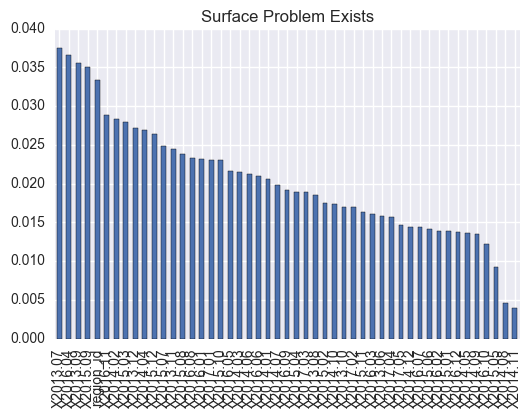

In [521]:
# Plot the weighted coefficients for the Random Forest... 
# Classifier that is classifying 'Curb Ramp Exists'

print(Curb_clf.feature_importances_)

weights = pd.Series(Curb_clf.feature_importances_[:,],index=cdf_NoT_KNN1.columns)
weights.sort(ascending = False)

#UPDATE TO REFLECT DIFFERENT SIDEWALK LABELS

#Title for Curb Ramp
#weights.plot(title = "Curb Ramp Exists", kind='bar')

#Title for No Curb Ramp
#weights.plot(title = "No Curb Ramp", kind='bar')

#Title for Obstacles
#weights.plot(title = "Obstacle Exists", kind='bar')

#Title for Surface Problem
weights.plot(title = "Surface Problem Exists", kind='bar')




#ask how to make this more readable? top 10/top 5? possibly in quarterly increments?
#possibly remove the bottom half of the importances for the graph (more readable?)

look into re-running the KNN/random forest analysis with only the top half of the "importance" variables

use the same code but swap out variables for ease of reading/running

TOP 10 FOR CURB RAMP
- X2015_01
- X2016_11
- X2016_04
- X2014_11
- X2016_10
- X2013_07
- X2015_12
- X2014_02
- X2015_08
- X2016_01

TOP 10 FOR NO CURB
- X2016_10
- X2013_08
- X2016_04
- X2014_02
- X2015_01
- X2014_04
- X2013_12
- X2015_02
- X2015_12
- X2013_06

TOP 10 FOR OBSTACLE
- X2016_04
- X2016_09
- X2017_05
- X2013_11
- X2013_09
- X2016_03
- X2015_09
- X2016_07
- X2015_08
- X2016_05

TOP 10 FOR SURFACE PROBLEM
- X2013_07
- X2016_04
- X2013_09
- X2015_09
- X2016_11
- X2014_02
- X2015_03
- X2013_12
- X2014_04
- X2015_12

In [474]:
#Logistic Regression
np.random.seed(9999)

DF_SVM_Curb= cdf_REG.copy()

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

if 'CutCurb_curb' in DF_SVM_Curb:
    y = DF_SVM_Curb[labelmatrix].values 
    del DF_SVM_Curb[labelmatrix]
    X = DF_SVM_Curb.values

num_cv_iterations = 4
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=4, #num_cv_iterations
                         test_size  = 0.25)  

for train_indices, test_indices in cv_object: 
   
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

LRs_acc = mt.accuracy_score(y[test_indices],y_hat)
LRs_conf = mt.confusion_matrix(y[test_indices],y_hat)
print('LR accuracy:', LRs_acc )
print(LRs_conf)

LR accuracy: 0.5625
[[3 4]
 [3 6]]


In [476]:
#SVM for "curb ramp"

np.random.seed(9999)

scl_obj = StandardScaler()
scl_obj.fit(X[train_indices]) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X[train_indices]) # apply to training
X_test_scaled = scl_obj.transform(X[test_indices]) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y[train_indices])  # train object

y_hat2 = svm_clf.predict(X_test_scaled) # get test set precitions

SVMs_acc2 = mt.accuracy_score(y[test_indices],y_hat2)
SVMs_conf2 = mt.confusion_matrix(y[test_indices],y_hat2)
print('SVM accuracy:', SVMs_acc2 )
print(SVMs_conf2)

SVM accuracy: 0.5625
[[4 3]
 [4 5]]


//anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


[[ 0.01324761 -0.50155301  0.21128913  0.72435896 -0.00414069 -0.32165236
   0.18037168 -0.06099049 -0.12068398  0.43247276 -0.4278552  -0.06986242
   0.01740663 -0.56783068  0.05535996  0.62599489 -0.1281756  -0.20028831
  -0.10268439 -0.10988566  0.07409712  0.29422313  0.25751703 -0.09273404
  -0.48079176  0.07939768  0.97865529  0.55003035 -0.8394067  -0.57510415
   0.28786391  0.1502388  -0.0178376  -0.50989461  0.09338906  0.3879223
  -0.19549191 -0.39118326 -0.38226707  0.46945666  0.89928135 -0.29055909
  -0.69230119 -0.16918229  0.16079745  0.01479536 -0.00344691  0.07479433
   0.22807818]]


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


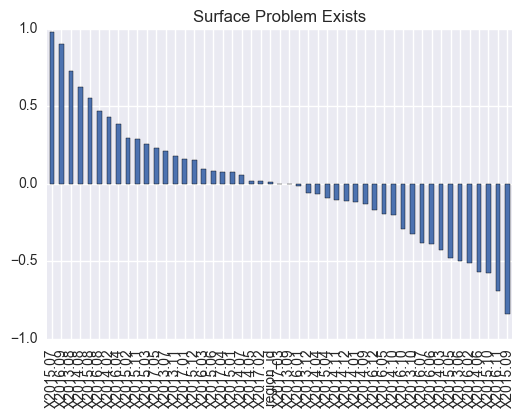

In [508]:
print(lr_clf.coef_)
try:
    weights = pd.Series(lr_clf.coef_[0],index=cdf_NoT_KNN1.columns)
    weights.sort(ascending = False)

#Title for Curb Ramp
    #weights.plot(title = "Curb Ramp Exists", kind='bar')

#Title for No Curb Ramp
    #weights.plot(title = "No Curb Ramp", kind='bar')

#Title for Obstacles
    #weights.plot(title = "Obstacle Exists", kind='bar')

#Title for Surface Problem
    weights.plot(title = "Surface Problem Exists", kind='bar')
    
except:    
        pass
    


## Re-Run analysis with only the top 10 features

In [478]:
#Use this data frame for CURB RAMP TOP 10
#cdf_10 = pd.concat((cdf1['region_id'], cdf1['CutCurb_curb'], cdf1['X2013.07'], cdf1['X2014.02'],
#                    cdf1['X2014.11'], cdf1['X2015.01'], cdf1['X2015.08'], cdf1['X2015.12'],
#                    cdf1['X2016.01'], cdf1['X2016.04'], cdf1['X2016.10'], cdf1['X2016.11']),axis=1)

#Use this data frame for NO CURB RAMP TOP 10
#cdf_10 = pd.concat((cdf1['region_id'], cdf1['CutNoCurb_Nocurb'], cdf1['X2013.06'], cdf1['X2013.08'],
#                    cdf1['X2013.12'], cdf1['X2014.02'], cdf1['X2014.04'], cdf1['X2015.01'],
#                    cdf1['X2015.02'], cdf1['X2015.12'], cdf1['X2016.04'], cdf1['X2016.10']),axis=1)

#Use this data frame for OBSTACLE TOP 10
#cdf_10 = pd.concat((cdf1['region_id'], cdf1['CutObs_obstacle'], cdf1['X2013.09'], cdf1['X2013.11'],
#                    cdf1['X2015.08'], cdf1['X2015.09'], cdf1['X2016.03'], cdf1['X2016.04'],
#                    cdf1['X2016.05'], cdf1['X2016.07'], cdf1['X2016.09'], cdf1['X2017.05']),axis=1)
                
#Use this data frame for SURFACE PROBLEM TOP 10
cdf_10 = pd.concat((cdf1['region_id'], 
                    cdf1['CutSurf_surfProb'],
                    cdf1['X2013.07'], 
                    cdf1['X2013.09'],
                    cdf1['X2013.12'],
                    cdf1['X2014.02'],
                    cdf1['X2014.04'],
                    cdf1['X2015.03'],
                    cdf1['X2015.09'],
                    cdf1['X2015.12'],
                    cdf1['X2016.04'],
                    cdf1['X2016.11']),axis=1)

In [479]:
#labelmatrix = "CutCurb_curb"
#labelmatrix = "CutNoCurb_Nocurb"
#labelmatrix = "CutObs_obstacle"
labelmatrix = "CutSurf_surfProb"

In [480]:
#KNN TESTING

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

np.random.seed(9999)

# X = create a matrix with all variable except response variable in it. rno_000001
# Y = this should be predictor variable
# create variables we are more familiar with
cdf_NoT_KNN10 = cdf_10.copy()
del cdf_NoT_KNN10[labelmatrix]

X = cdf_NoT_KNN10.as_matrix()
y = cdf_10[labelmatrix].as_matrix()


yhat = np.zeros(y.shape) # we will fill this with predictions

# create cross validation iterator
cv = StratifiedKFold(n_splits=2)

# get a handle to the classifier object, which defines the type
KNN1_clf = KNeighborsClassifier(leaf_size=10, n_neighbors=2)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    KNN1_clf.fit(X[train],y[train])
    yhat[test] = KNN1_clf.predict(X[test])
    
#set seed for consistent results


KNNs_total_accuracy = mt.accuracy_score(y, yhat)
KNNs_conf = mt.confusion_matrix(y, yhat)
print ('KNN Accuracy: Top 10', KNNs_total_accuracy)
print(KNNs_conf)    

KNN Accuracy: Top 10 0.540983606557
[[25  6]
 [22  8]]


### COMPARE THE RESULTS: KNN TOP 10 IMPORTANCES

KNN TESTING RESULTS:
Curb Ramp Exists 0.573770491803
- [[21 10]
- [16 14]]
 
No Curb Ramp 0.524590163934
- [[22  8]
- [21 10]]
 
Obstacles Exist 0.409836065574
- [[21  9]
- [27  4]]

Surface Problems Exist 0.540983606557
- [[25  6]
- [22  8]]



In [481]:
#random forest testing 1
from sklearn.ensemble import RandomForestClassifier

np.random.seed(9999)

clf = RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
RFs_total_accuracy = mt.accuracy_score(y, yhat)
RFs_conf = mt.confusion_matrix(y, yhat)
print ('Random Forest Test Accuracy: Top 10', RFs_total_accuracy)
print (RFs_conf)

Random Forest Test Accuracy: Top 10 0.590163934426
[[17 14]
 [11 19]]


### COMPARE THE RESULTS: RANDOM FOREST TEST TOP 10

Curb Ramp Accuracy 0.606557377049
- [[16 15]
- [ 9 21]]
 
No Curb Ramp 0.55737704918
- [[19 11]
- [16 15]]
 
Obstacles Exist 0.508196721311
- [[15 15]
- [15 16]]

Surface Problems Exist

In [505]:
#random forest testing 2: training

Curb_clf = RandomForestClassifier(max_depth=30, max_features=6, n_estimators=91, 
                                  n_jobs=-1, oob_score=True)

np.random.seed(9999)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    Curb_clf.fit(X[train],y[train])
    yhat[test] = Curb_clf.predict(X[test])
    
RFs_total_accuracy = mt.accuracy_score(y, yhat)
RFs_conf = mt.confusion_matrix(y, yhat)
print ('Random Forest Train Accuracy: Top 10', RFs_total_accuracy)
print (RFs_conf)

Random Forest Train Accuracy: Top 10 0.622950819672
[[17 14]
 [ 9 21]]


### COMPARE THE RESULTS: 

(tuned with max_depth=30, max_features=9, n_estimators=10)
Curb Ramp Accuracy 0.639344262295
- [[21 10]
- [12 18]]
 
(tuned with max_depth=30, max_features=10, n_estimators=60) 
No Curb Ramp 0.672131147541
- [[19 11]
- [ 9 22]]

(tuned with max_depth=30, max_features=3, n_estimators=49)
Obstacles Exist 0.508196721311
- [[15 15]
- [15 16]]

(tuned with max_depth=30, max_features=6, n_estimators=91)
Surface Problems Exist 0.622950819672
- [[17 14]
- [ 9 21]]

[ 0.18276831  0.10890741  0.04397943  0.10114488  0.09248889  0.07842433
  0.05384969  0.10806458  0.08007778  0.05937713  0.09091757]


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


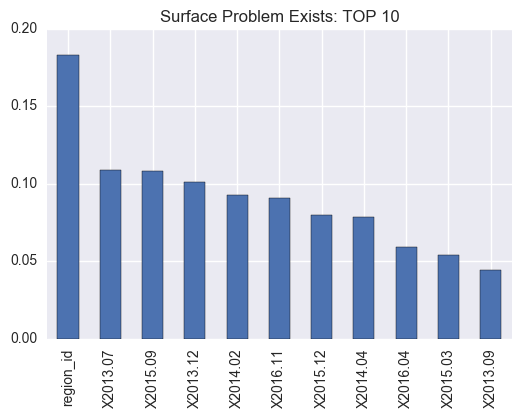

In [507]:
# Plot the weighted coefficients for the Random Forest... 

print(Curb_clf.feature_importances_)

weights = pd.Series(Curb_clf.feature_importances_[:,],index=cdf_NoT_KNN10.columns)
weights.sort(ascending = False)

#UPDATE TO REFLECT DIFFERENT SIDEWALK LABELS

#Title for Curb Ramp
#weights.plot(title = "Curb Ramp Exists: TOP 10", kind='bar')

#Title for No Curb Ramp
#weights.plot(title = "No Curb Ramp: TOP 10", kind='bar')

#Title for Obstacles
#weights.plot(title = "Obstacle Exists: TOP 10", kind='bar')

#Title for Surface Problem
weights.plot(title = "Surface Problem Exists: TOP 10", kind='bar')